In [41]:
#
# libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#
# UN population data
# https://population.un.org/wpp/Download/Standard/Interpolated/
#
pop_data = pd.read_csv('Datasets/world_pop_100_plus.csv')
print(pop_data.head(21))
print(pop_data.dtypes)

        date  population aged 100+ (000)
0   7/1/1950                          34
1   7/1/1951                          31
2   7/1/1952                          29
3   7/1/1953                          27
4   7/1/1954                          25
5   7/1/1955                          24
6   7/1/1956                          23
7   7/1/1957                          22
8   7/1/1958                          21
9   7/1/1959                          21
10  7/1/1960                          20
11  7/1/1961                          20
12  7/1/1962                          20
13  7/1/1963                          20
14  7/1/1964                          20
15  7/1/1965                          20
16  7/1/1966                          21
17  7/1/1967                          21
18  7/1/1968                          21
19  7/1/1969                          22
20  7/1/1970                          23
date                          object
population aged 100+ (000)     int64
dtype: object


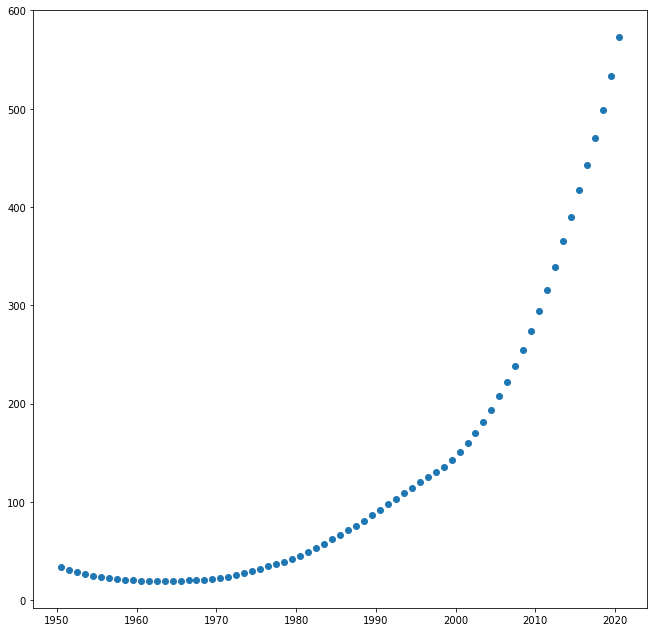

In [3]:
#
# convert date from object to datetime
# plot as a time series
#
pop_data['date'] = pd.to_datetime(pop_data['date'], format = "%m/%d/%Y")
fig, ax = plt.subplots(figsize = (11, 11))
ax.scatter(pop_data.date, pop_data['population aged 100+ (000)'])
plt.show()

In [4]:
five_yr_avg = pop_data.resample('5Y', 
                                on = 'date', 
                                closed = 'right').mean()
five_yr_avg.head()

,population aged 100+ (000)
date,
1950-12-31,34.0
1955-12-31,27.2
1960-12-31,21.4
1965-12-31,20.0
1970-12-31,21.6


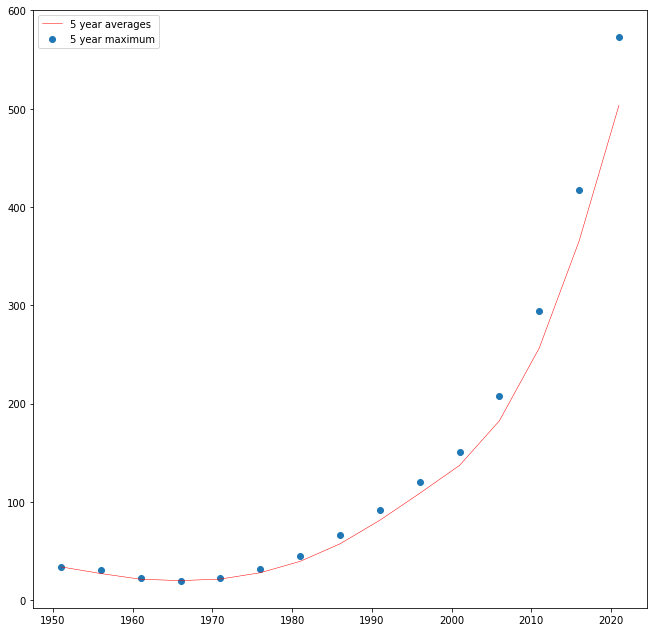

In [5]:
five_yr_max = pop_data.resample('5Y', on = 'date', closed = 'right').max()
fig, ax = plt.subplots(figsize = (11, 11))
ax.scatter(five_yr_max.index, five_yr_max['population aged 100+ (000)'],
          label = '5 year maximum')
ax.plot(five_yr_avg.index, five_yr_avg['population aged 100+ (000)'], 
        lw = 0.5, color = "red",
       label = '5 year averages')
ax.legend()
plt.show()


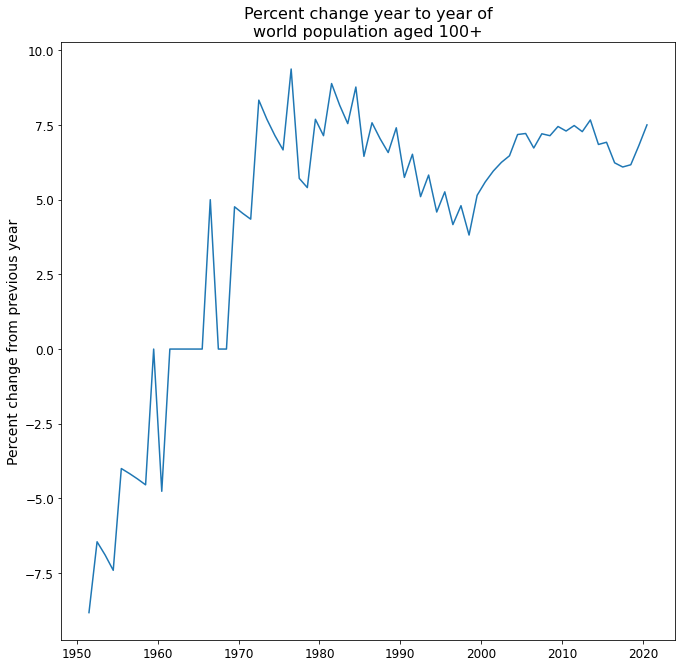

In [6]:
fig, ax = plt.subplots(figsize = (11, 11))
ax.plot(pop_data.date, 100 * pop_data['population aged 100+ (000)'].pct_change())
ax.set_title('Percent change year to year of\nworld population aged 100+',
            fontsize = 16)
ax.set_ylabel('Percent change from previous year',
             fontsize = 14)
ax.tick_params(labelsize = 12)
plt.show()


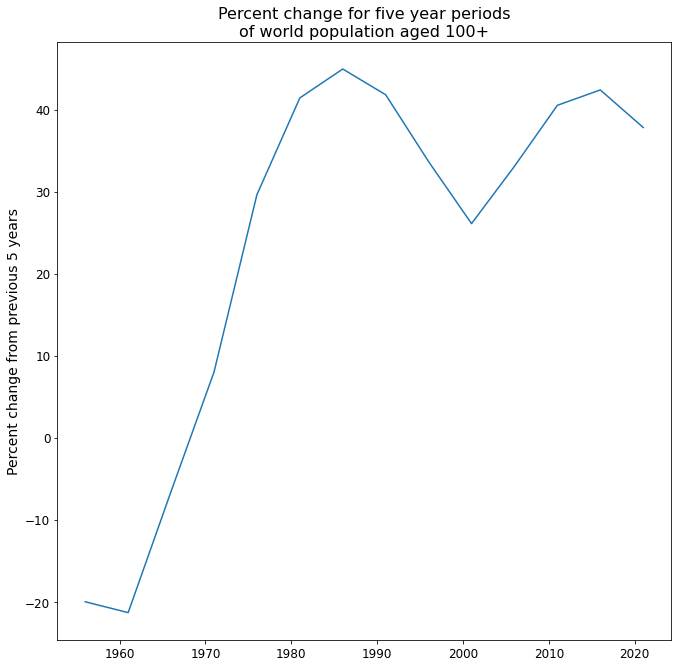

In [7]:
five_yr_mean = pop_data.resample('5Y', on = 'date', closed = 'right').mean()
fig, ax = plt.subplots(figsize = (11, 11))
ax.plot(five_yr_mean.index, 
        100 * five_yr_mean['population aged 100+ (000)'].pct_change())
ax.set_title('Percent change for five year periods\nof world population aged 100+',
            fontsize = 16)
ax.set_ylabel('Percent change from previous 5 years',
             fontsize = 14)
ax.tick_params(labelsize = 12)
plt.show()


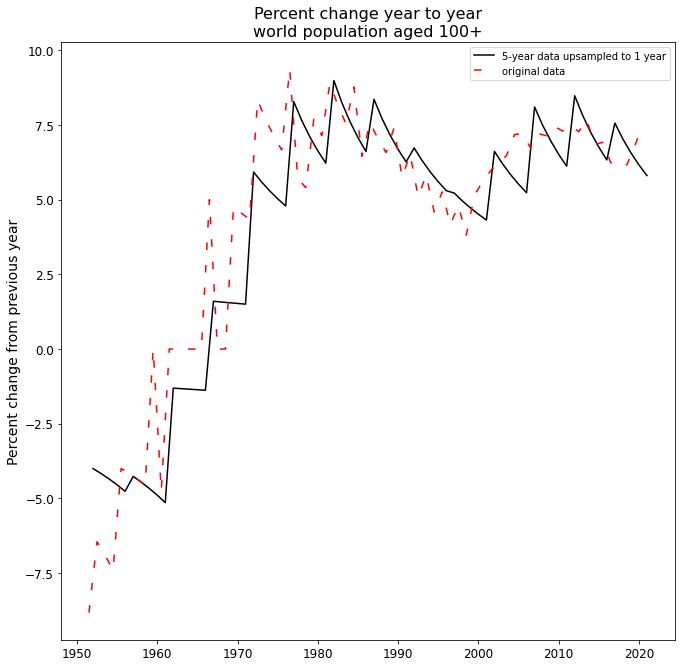

In [148]:
yr_from_5_yr_mean = five_yr_mean.resample('1Y', closed = 'right').interpolate()
fig, ax = plt.subplots(figsize = (11, 11))
ax.plot(yr_from_5_yr_mean.index, 
        100 * yr_from_5_yr_mean['population aged 100+ (000)'].pct_change(),
       color = 'black', label = '5-year data upsampled to 1 year')
ax.plot(pop_data.date, 
        100 * pop_data['population aged 100+ (000)'].pct_change(),
        linestyle = (0, (5, 10)),
       color = 'red', label = 'original data')
ax.set_title('Percent change year to year\nworld population aged 100+',
            fontsize = 16)
ax.set_ylabel('Percent change from previous year',
             fontsize = 14)
ax.tick_params(labelsize = 12)
ax.legend()
plt.show()


In [51]:
pop_data['decade'] = pop_data['date'].dt.year
pop_data['decade'] = round((pop_data['decade'] / 10), 0) * 10
pop_data.groupby('decade').mean()

,population aged 100+ (000)
decade,
1950.0,29.200000
1960.0,21.000000
1970.0,24.000000
1980.0,47.000000
1990.0,92.333333
2000.0,156.272727
2010.0,299.222222
2020.0,489.166667


In [60]:
pop_data_by_gender = pd.read_csv('Datasets/world_pop_100_plus_by_gender.csv')
pop_data_by_gender['date'] = pd.to_datetime(pop_data_by_gender['date'], format = "%m/%d/%Y")
pop_data_by_gender.head(6)

,date,population aged 100+ (000),gender
0,1950-07-01,9,male
1,1950-07-01,25,female
2,1951-07-01,8,male
3,1951-07-01,23,female
4,1952-07-01,8,male
5,1952-07-01,21,female


In [83]:
pop_data_by_gender['decade'] = pop_data_by_gender['date'].dt.year
pop_data_by_gender['decade'] = (round((pop_data_by_gender['decade'] / 10), 0) * 10).astype(int)
pop_data_by_gender.groupby(['gender', 'decade']).mean()

population aged 100+ (000)
gender decade                            
female 1950                     21.600000
       1960                     15.818182
       1970                     18.444444
       1980                     36.545455
       1990                     74.000000
       2000                    127.545455
       2010                    240.888889
       2020                    386.166667
male   1950                      7.600000
       1960                      5.181818
       1970                      5.777778
       1980                     10.454545
       1990                     18.333333
       2000                     28.818182
       2010                     58.222222
       2020                    103.166667

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
car_data = pd.read_csv('Datasets/auto-mpg.data.csv')
scaled_data = scaler.fit_transform(car_data.iloc[:, :-1])
scaled_data = pd.DataFrame(scaled_data).cov()
scaled_data.columns = car_data.columns[:-1]
scaled_data.set_index(car_data.columns[:-1], inplace = True)
scaled_data

,mpg,cyl,disp,hp,weight,accel,my
mpg,1.002558,-0.779606,-0.807186,-0.780418,-0.834373,0.424411,0.582026
cyl,-0.779606,1.002558,0.953255,0.845139,0.899823,-0.505974,-0.346531
disp,-0.807186,0.953255,1.002558,0.899552,0.935381,-0.545191,-0.370801
hp,-0.780418,0.845139,0.899552,1.002558,0.866749,-0.690958,-0.417426
weight,-0.834373,0.899823,0.935381,0.866749,1.002558,-0.417905,-0.309910
accel,0.424411,-0.505974,-0.545191,-0.690958,-0.417905,1.002558,0.291059
my,0.582026,-0.346531,-0.370801,-0.417426,-0.309910,0.291059,1.002558


In [164]:
#
# unemployment data in for the US for 30 years by month
# https://data.bls.gov/timeseries/LNS14000000
#
emp_data = pd.read_csv('Datasets/US_unemployment_by_month.csv')
emp_data['date'] = pd.to_datetime(emp_data['date'], format = '%m/%d/%Y')
rolling = emp_data.rolling(on = 'date', window = '180d').mean()
samples = emp_data.resample(on = 'date', rule = '180d', label = 'right').mean()

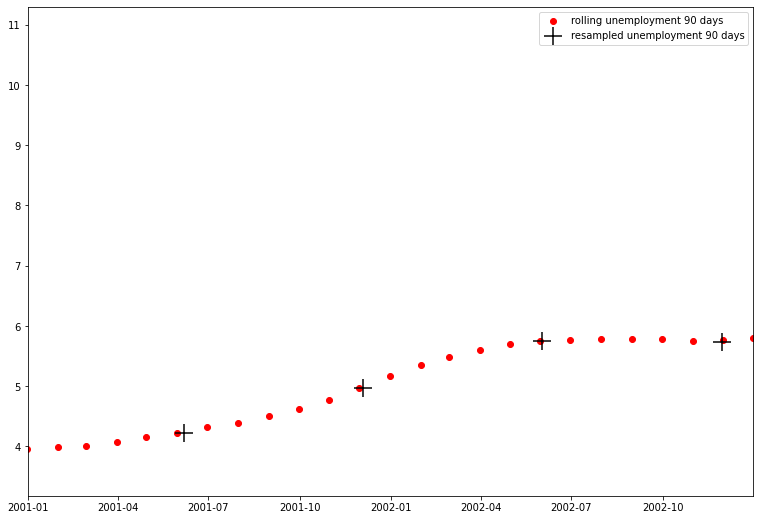

In [166]:
fig, ax = plt.subplots(figsize = (13, 9))
ax.scatter(rolling['date'], rolling['unemployment'],
          marker = 'o', color = 'red', 
           label = 'rolling unemployment 90 days')
ax.scatter(samples.index, samples['unemployment'],
          marker = '+', color = 'black', s = 300,
           label = 'resampled unemployment 90 days')
ax.set_xlim(pd.to_datetime('1/1/2001'), 
            pd.to_datetime('12/31/2002'))
ax.legend()
plt.show()

<AxesSubplot:xlabel='DATE'>

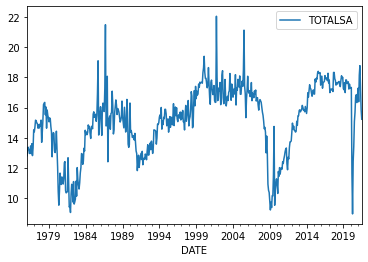

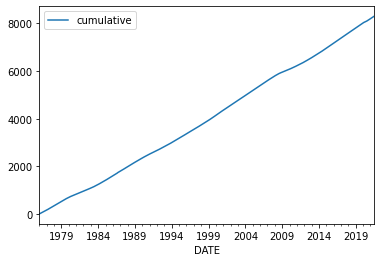

In [271]:
#
# total vehicle sales in US by year
# https://fred.stlouisfed.org/series/TOTALSA
#
veh_sales = pd.read_csv('Datasets/TOTALSA.csv')
veh_sales['DATE'] = pd.to_datetime(veh_sales['DATE'], format = '%Y-%m-%d')
veh_sales.plot('DATE', 'TOTALSA')
veh_sales['cumulative'] = veh_sales['TOTALSA'].expanding().sum()
veh_sales.plot('DATE', 'cumulative')

In [272]:
veh_sales.drop(columns = ['cumulative'], inplace = True)
base_forecast = \
    (veh_sales.copy().set_index('DATE',
                               drop = True).
     rolling(window = '90d').mean())
weighted_forecast = \
    (veh_sales.copy().set_index('DATE',
                                drop = True).
     rolling(window = 3, win_type = 'exponential',
             min_periods = 1).mean(tau = 1, 
                                   sym = False, 
                                   center = 3))

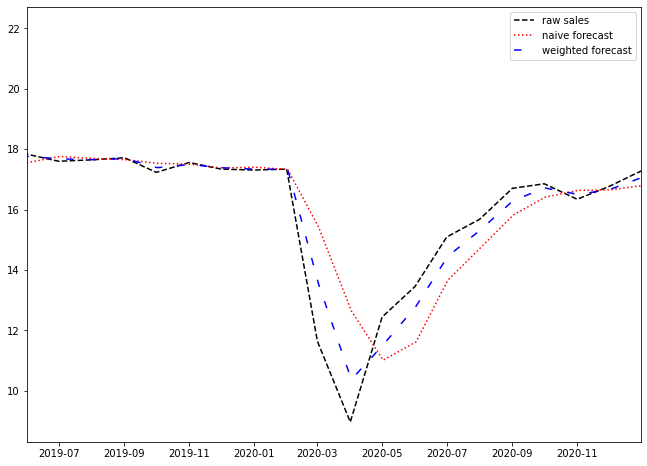

In [296]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(veh_sales['DATE'], veh_sales['TOTALSA'], 
        color = 'black', linestyle = 'dashed', label = 'raw sales')
ax.plot(base_forecast.index.shift(1, 'D'), base_forecast['TOTALSA'], 
        color = 'red', linestyle = 'dotted', label = 'naive forecast')
ax.plot(weighted_forecast.index.shift(1, 'D'), weighted_forecast['TOTALSA'], 
        color = 'blue', linestyle = (0, (5, 10)), label = 'weighted forecast')
ax.set_xlim(pd.to_datetime('6/1/2019'), pd.to_datetime('12/31/2020'))
ax.legend()
plt.show()

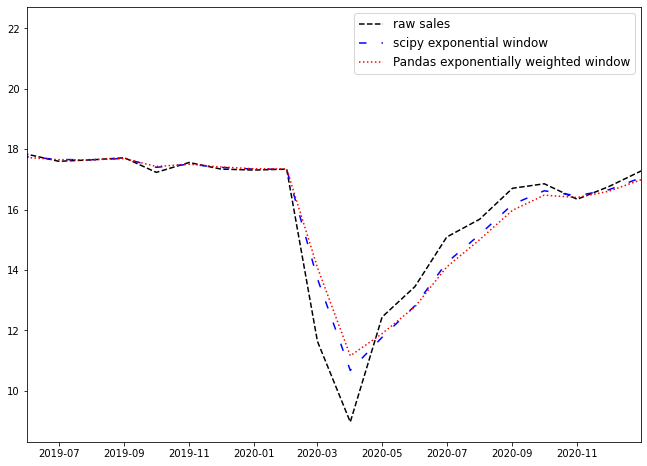

In [298]:
my_window = 5
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(veh_sales['DATE'],
        veh_sales.loc[:, 'TOTALSA'], 
        color = 'black', linestyle = 'dashed', 
        label = 'raw sales')
ax.plot(veh_sales['DATE'],
        veh_sales.rolling(window = my_window, 
                          min_periods = 1, 
                          win_type = 'exponential').\
        mean(sym = False, center = 5, tau = 1).loc[:, 'TOTALSA'], 
        color = 'blue', linestyle = (0, (5, 10)), 
        label = 'scipy exponential window')
ax.plot(veh_sales['DATE'],
        veh_sales.ewm(span = my_window / 2,
                      min_periods = 1).\
        mean().loc[:, 'TOTALSA'], 
        color = 'red', linestyle = 'dotted', 
        label = 'Pandas exponentially weighted window')
ax.set_xlim(pd.to_datetime('6/1/2019'),
           pd.to_datetime('12/31/2020'))
ax.legend(fontsize = 12)
plt.show()


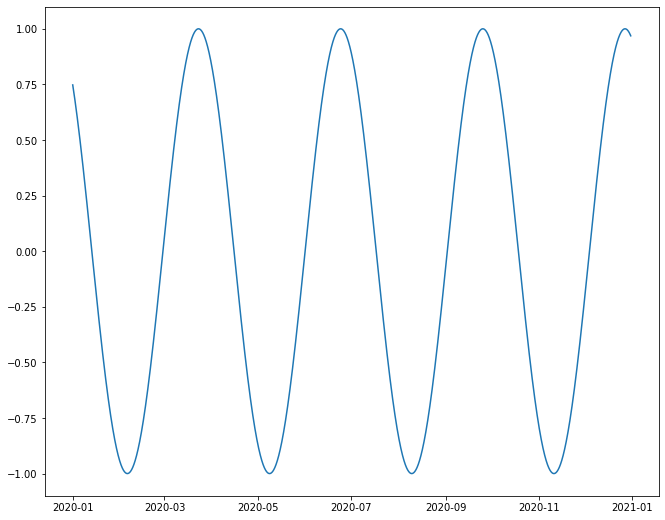

In [393]:
#
# create a function as a sine wave vs. time
#
times = pd.to_datetime(np.arange(0, 60*60*1e9*24*365, 60*60*1e9*0.5), 
                       origin = '2020-01-01')
data = np.sin(2 * np.pi * 
              times.values.astype(float) / 1e9 / 93 / 60 / 60/ 24)
fig, ax = plt.subplots(figsize = (11, 9))
ax.plot(times, data)
plt.show()

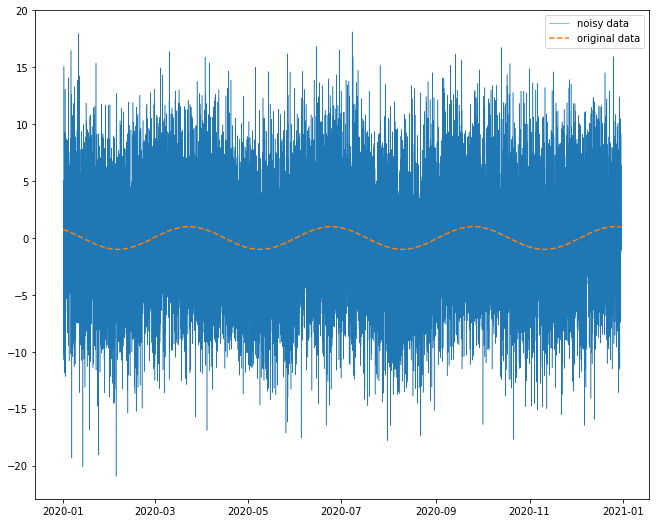

In [397]:
noisy_data = data + np.random.normal(0, 5, len(times))
fig, ax = plt.subplots(figsize = (11, 9))
ax.plot(times, noisy_data, 
        linewidth = 0.5,
        label = 'noisy data')
ax.plot(times, data, 
        linestyle = 'dashed',
        label = 'original data')
ax.legend()
plt.show()

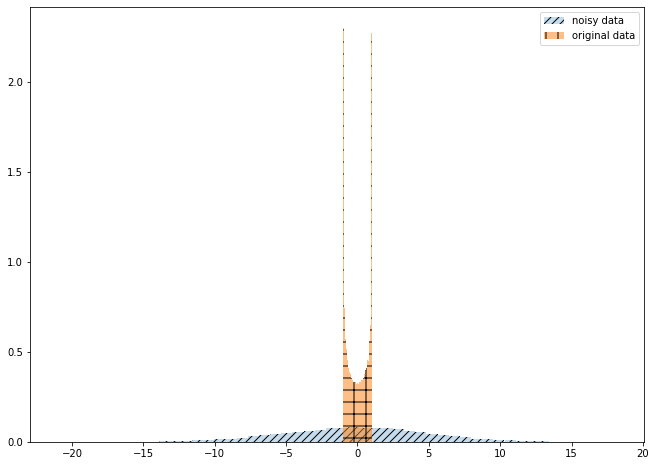

In [423]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(noisy_data, bins = 50, label = 'noisy data', 
        density = True,
        hatch = '///', alpha = 0.25)
ax.hist(data, bins = 50, label = 'original data',
        density = True,
        hatch = '+', alpha = 0.5)
ax.legend()
plt.show()

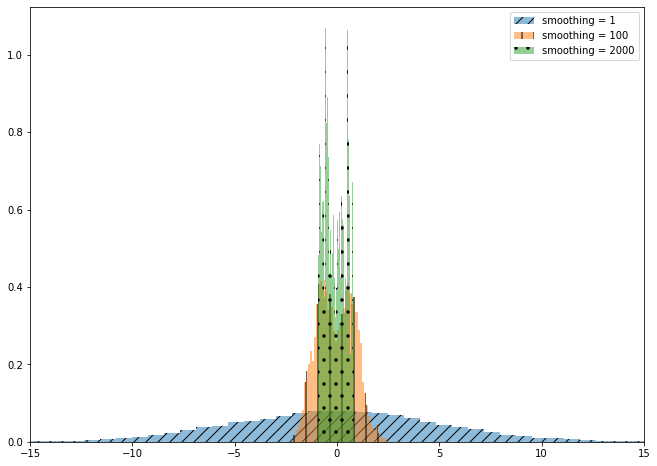

In [412]:
fig, ax = plt.subplots(figsize = (11, 8))
smoothing = [1, 100, 2000]
hatches = ['//', '|', '.']
for i in range(len(smoothing)):
    smooth = smoothing[i]
    hatch = hatches[i]
    ax.hist(pd.Series(noisy_data).rolling(window = smooth, center = True).mean(),
            density = True, bins = 50,
            hatch = hatch,
            label = 'smoothing = ' + str(smooth),
            alpha = 0.5)
ax.set_xlim(-15, 15)
ax.legend()
plt.show()

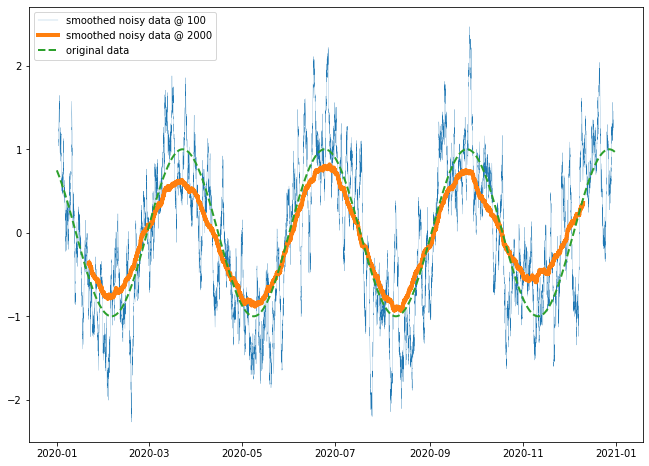

In [420]:
smoothing = [100, 2000]
fig, ax = plt.subplots(figsize = (11, 8))
for smooth in smoothing:
    ax.plot(times, pd.Series(noisy_data).rolling(window = smooth, center = True).mean(),
           label = 'smoothed noisy data @ ' + str(smooth),
           linewidth = smooth / 500)
ax.plot(times, data, 
        label = 'original data',
        linestyle = 'dashed',
        linewidth = 2)
ax.legend()
plt.show()

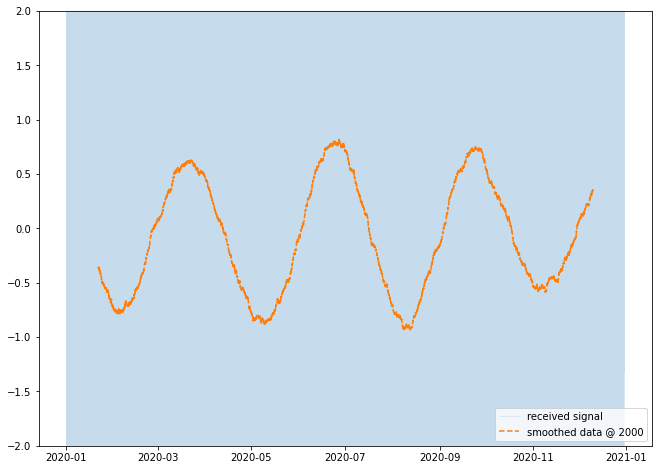

In [473]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(times, noisy_data,
       label = 'received signal',
       linewidth = 0.5,
       alpha = 0.25)
ax.plot(times, pd.Series(noisy_data).rolling(window = 2000, 
                                             center = True).mean(),
       label = 'smoothed data @ 2000', 
       linestyle = 'dashed')
ax.set_ylim(-2, 2)
ax.legend()
plt.show()

In [500]:
#
# read in exoplanet data
#
exoplanets = pd.read_csv('Datasets/exo_planet_reporting.csv')
exoplanets

,date,num_recorded,cumulative_recorded
0,1/1/1992,2,2
1,4/1/1994,1,3
2,11/1/1995,1,4
3,1/1/1997,3,7
4,7/1/1997,2,9
...,...,...,...
234,4/1/2021,2,4418
235,5/1/2021,28,4446
236,6/1/2021,6,4452
237,7/1/2021,16,4468


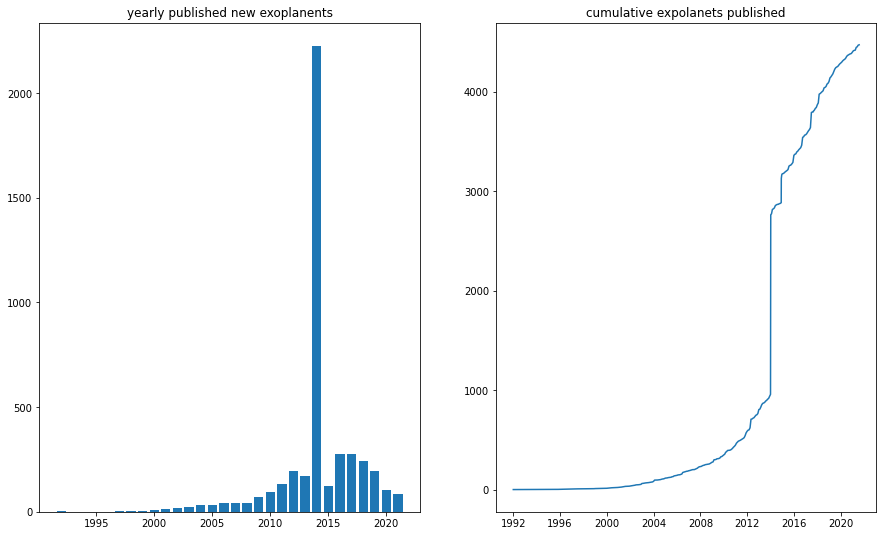

In [501]:
exoplanets['date'] = pd.to_datetime(exoplanets['date'], format = '%m/%d/%Y')
exoplanets['year'] = exoplanets['date'].dt.year
yearly_totals = exoplanets[['year', 'num_recorded']].groupby('year').sum()
fig, ax = plt.subplots(1, 2, figsize = (15, 9))
ax[0].bar(yearly_totals.index, yearly_totals['num_recorded'])
ax[0].set_title('yearly published new exoplanents')
ax[1].plot(exoplanets['date'], exoplanets['cumulative_recorded'])
ax[1].set_title('cumulative expolanets published')
plt.show()

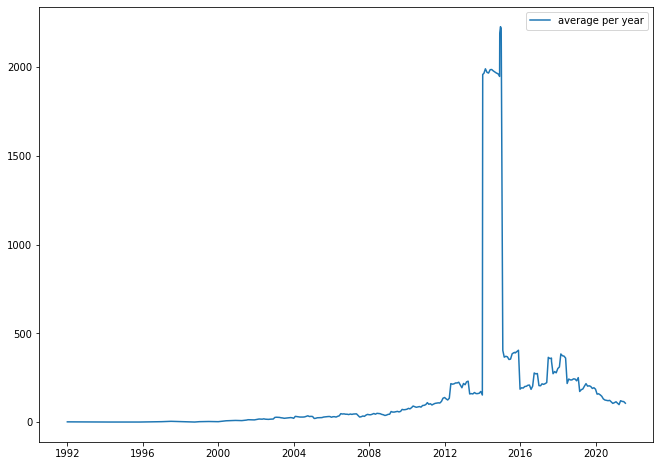

In [508]:
exoplanets.set_index('date', drop = True, inplace = True)
fig, ax = plt.subplots(figsize = (11,8))
ax.plot(exoplanets.index, 
        exoplanets.rolling(window = '365d').sum()['num_recorded'],
       label = 'average per year')
ax.legend()
plt.show()

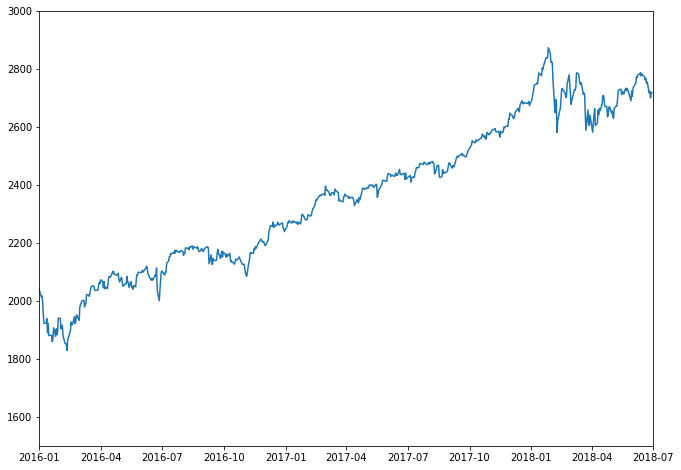

In [524]:
#
# read in stock index data
#
SPX = pd.read_csv('Datasets/spx.csv')
#
# convert dates and make simple plot
#
SPX['date'] = pd.to_datetime(SPX['date'], format = '%d-%b-%y')
SPX.set_index('date', drop = True, inplace = True)
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(SPX.index, SPX['close'])
ax.set_xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2018-07-01'))
ax.set_ylim(1500, 3000)
plt.show()

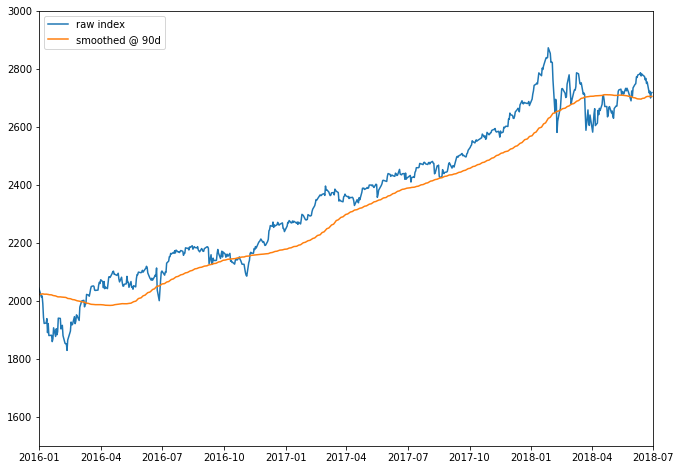

In [522]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(SPX.index, SPX['close'], label = 'raw index')
ax.plot(SPX.index, SPX.rolling(window = 90).mean(), label = 'smoothed @ 90d')
ax.set_xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2018-07-01'))
ax.set_ylim(1500, 3000)
ax.legend()
plt.show()

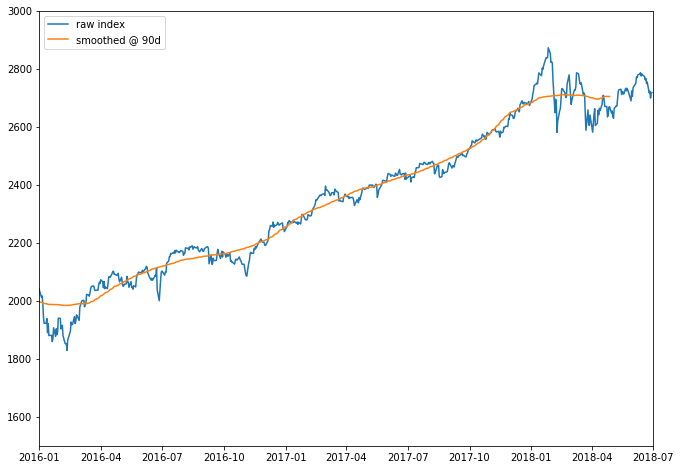

In [523]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(SPX.index, SPX['close'], label = 'raw index')
ax.plot(SPX.index, SPX.rolling(window = 90, center = True).mean(), 
        label = 'smoothed @ 90d')
ax.set_xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2018-07-01'))
ax.set_ylim(1500, 3000)
ax.legend()
plt.show()

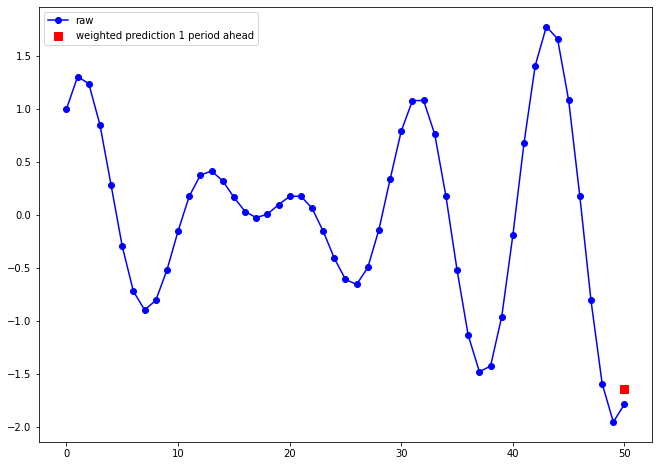

In [650]:
#
# define a custom function that weights in a linear fashion
#
# given a vector z, and a window w
# the weights range from 1/w to 1 increasing over the window
# note what window w is defined outside the function and is 
# in the scope external to the function
#
linear_window = (lambda z: np.sum(z[len(z)-w:len(z)] * 
                                  (np.arange(1, w + 1)/(w))) / 
                 (np.sum(np.arange(1, w + 1)/(w))))
#
# create a series
#
length = 51
x = pd.Series(np.sin(2 * np.pi * np.arange(length) / 13) + 
              np.cos(2 * np.pi * np.arange(length) / 11))
#
# now apply the linear weighting with .rolling()
# using the .apply method; raw = False passes the vectors as Pandas series
#
w = 3
#
# compute the weighted rolling series excluding the 
# most recent value of x
#
weighted = x[:-1].rolling(window = w).apply(linear_window, raw = False)
#
# plot the original series, and
# use the last value of the weighted series
# as the prediction of the most recent x value
#
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(x.index, x, 
        marker = 'o', label = 'raw', color = 'blue')
ax.scatter(list(weighted.index + 1)[-1], weighted.iloc[-1], 
           marker = 's', s = 50, 
           label = 'weighted prediction 1 period ahead', color = 'red')
ax.legend()
plt.show()
